In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
games = os.listdir('YakkertechData')[:-4]
dflst = []
for game in games:
    dflst.append(pd.read_csv(os.path.join('YakkertechData', game)))
allgamedata = pd.concat(dflst)
allgamedata

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,yt_HitSpinConfidence,yt_EffectiveBattingSpeed,yt_ReleaseAccuracy,yt_ZoneAccuracy,yt_SeamLat,yt_SeamLong,yt_ReleaseDistance,Catcher,CatcherId,CatcherTeam
0,1,01/20/2023,1:03:24 PM,1,1,Nolan Mccracken,mccrano42,Right,Uc san diego,Bradlee Preap,...,NaN,NaN,high,high,16.649588,-23.315828,53.231277,NaN,NaN,NaN
1,2,01/20/2023,1:03:52 PM,1,2,Nolan Mccracken,mccrano42,Right,Uc san diego,Bradlee Preap,...,NaN,NaN,high,high,11.755224,-3.302182,53.335639,NaN,NaN,NaN
2,3,01/20/2023,1:04:12 PM,1,3,Nolan Mccracken,mccrano42,Right,Uc san diego,Bradlee Preap,...,NaN,NaN,high,high,27.008184,-71.725414,53.508536,NaN,NaN,NaN
3,4,01/20/2023,1:04:34 PM,2,1,Nolan Mccracken,mccrano42,Right,Uc san diego,Bradlee Preap,...,NaN,NaN,high,high,40.351346,-15.92502,53.451727,NaN,NaN,NaN
4,5,01/20/2023,1:05:06 PM,2,2,Nolan Mccracken,mccrano42,Right,Uc san diego,Ben Pajak,...,NaN,NaN,high,high,44.363811,57.32922,53.270835,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,11/16/2022,9:22:22 AM,2,3,Zachary Ernisse,NaN,Left,Uc san diego,Crew Robinson,...,NaN,35.545796,high,high,NaN,NaN,54.252345,NaN,NaN,NaN
75,76,11/16/2022,9:22:50 AM,3,1,Zachary Ernisse,NaN,Left,Uc san diego,Brock Kleszcz,...,NaN,NaN,high,low,NaN,NaN,54.295606,NaN,NaN,NaN
76,77,11/16/2022,9:23:04 AM,3,2,Zachary Ernisse,NaN,Left,Uc san diego,Brock Kleszcz,...,NaN,NaN,high,high,NaN,NaN,54.309256,NaN,NaN,NaN
77,78,11/16/2022,9:23:18 AM,3,3,Zachary Ernisse,NaN,Left,Uc san diego,Brock Kleszcz,...,NaN,NaN,high,high,NaN,NaN,54.171285,NaN,NaN,NaN


In [3]:
allFB = allgamedata[allgamedata.TaggedPitchType == 'Fastball']
allFB = allFB[['PitcherThrows', 'InducedVertBreak', 'VertBreak', 'yt_Efficiency', 'SpinRate', 'Tilt', 'SpinAxis', 'RelSpeed', 'Extension', 'yt_GyroSpin']]
allFB = allFB.dropna()
allFB

,PitcherThrows,InducedVertBreak,VertBreak,yt_Efficiency,SpinRate,Tilt,SpinAxis,RelSpeed,Extension,yt_GyroSpin
0,Right,15.39505,-15.225392,95.698067,2243.318786,12:45,203.456409,93.181195,7.268723,-650.902744
1,Right,16.128602,-13.920308,94.001842,2331.242797,12:30,197.571868,94.325621,7.164361,-795.242167
4,Right,15.309531,-14.720538,96.571451,2267.534131,12:45,204.779323,93.436131,7.229165,-588.66639
7,Right,15.150609,-15.166215,96.021025,2268.054005,12:45,205.624413,93.044028,7.239898,-633.417894
9,Right,15.560563,-15.003616,90.68013,2333.037235,12:45,201.631627,93.545168,7.130828,-983.511218
...,...,...,...,...,...,...,...,...,...,...
52,Right,14.135811,-18.121188,98.936835,2127.864821,1:15,214.473261,92.392651,6.574396,-309.458231
63,Right,15.17802,-16.649501,96.392116,2250.741728,1:00,209.48167,92.254524,6.805102,-599.120213
69,Left,14.034552,-20.771267,99.599001,1952.257876,10:45,145.862809,89.870935,6.085815,-174.657719
70,Left,14.15857,-19.962815,99.003777,1933.897393,11:00,148.918086,91.72484,6.18387,-272.296665


Convert Tilt into a numerical value by assigning it a number I call "tiltpoints", which represents the tilt in "minutes" instead of the "hour:minute" clock format the tilt is collected in. The tilt_from_12 function will return the magnitude of the tilt away from 12:00, or straight over the top. Lower numbers will represent tilts higher up on the clock and bigger numbers will represent tilts lower on the clock. Tilts lower than 3 or 9 will be discarded as null, as those were likely misreads, and any pitch marked with lower than 50% efficiency is taken out due to its likelihood the pitch was a higher tilt slider mistagged as a fastball

In [4]:
def tilt_from_12(tilt):
    colonpos = tilt.find(':')
    hour = tilt[:colonpos]
    minute = tilt[colonpos+1:]
    if hour == '9':
        tiltpts = 180 - int(minute)
    elif hour == '10':
        tiltpts = 120 - int(minute)
    elif hour == '11':
        tiltpts = 60 - int(minute)
    elif hour == '12':
        tiltpts = int(minute)
    elif hour == '1':
        tiltpts = 60 + int(minute)
    elif hour == '2':
        tiltpts = 120 + int(minute)
    else:
        tiltpts = np.nan
    return tiltpts
tiltc = allFB.Tilt.apply(tilt_from_12)
allFBclean = allFB.assign(Tilt = tiltc)
allFBclean = allFBclean[allFBclean.yt_Efficiency >= 50]
allFBclean

,PitcherThrows,InducedVertBreak,VertBreak,yt_Efficiency,SpinRate,Tilt,SpinAxis,RelSpeed,Extension,yt_GyroSpin
0,Right,15.39505,-15.225392,95.698067,2243.318786,45.0,203.456409,93.181195,7.268723,-650.902744
1,Right,16.128602,-13.920308,94.001842,2331.242797,30.0,197.571868,94.325621,7.164361,-795.242167
4,Right,15.309531,-14.720538,96.571451,2267.534131,45.0,204.779323,93.436131,7.229165,-588.66639
7,Right,15.150609,-15.166215,96.021025,2268.054005,45.0,205.624413,93.044028,7.239898,-633.417894
9,Right,15.560563,-15.003616,90.68013,2333.037235,45.0,201.631627,93.545168,7.130828,-983.511218
...,...,...,...,...,...,...,...,...,...,...
52,Right,14.135811,-18.121188,98.936835,2127.864821,75.0,214.473261,92.392651,6.574396,-309.458231
63,Right,15.17802,-16.649501,96.392116,2250.741728,60.0,209.48167,92.254524,6.805102,-599.120213
69,Left,14.034552,-20.771267,99.599001,1952.257876,75.0,145.862809,89.870935,6.085815,-174.657719
70,Left,14.15857,-19.962815,99.003777,1933.897393,60.0,148.918086,91.72484,6.18387,-272.296665


In [5]:
allFBclean.rename(columns = {'InducedVertBreak':'IVB', 'VertBreak':'VB', 'yt_Efficiency':'Efficiency', 
                             'SpinRate':'SpinRate', 'Tilt':'Tilt', 'SpinAxis':'SpinAxis', 
                             'RelSpeed': 'Velocity', 'Extension': 'Extension', 'yt_GyroSpin': 'GyroSpin'}, 
                  inplace = True)
allFBclean

,PitcherThrows,IVB,VB,Efficiency,SpinRate,Tilt,SpinAxis,Velocity,Extension,GyroSpin
0,Right,15.39505,-15.225392,95.698067,2243.318786,45.0,203.456409,93.181195,7.268723,-650.902744
1,Right,16.128602,-13.920308,94.001842,2331.242797,30.0,197.571868,94.325621,7.164361,-795.242167
4,Right,15.309531,-14.720538,96.571451,2267.534131,45.0,204.779323,93.436131,7.229165,-588.66639
7,Right,15.150609,-15.166215,96.021025,2268.054005,45.0,205.624413,93.044028,7.239898,-633.417894
9,Right,15.560563,-15.003616,90.68013,2333.037235,45.0,201.631627,93.545168,7.130828,-983.511218
...,...,...,...,...,...,...,...,...,...,...
52,Right,14.135811,-18.121188,98.936835,2127.864821,75.0,214.473261,92.392651,6.574396,-309.458231
63,Right,15.17802,-16.649501,96.392116,2250.741728,60.0,209.48167,92.254524,6.805102,-599.120213
69,Left,14.034552,-20.771267,99.599001,1952.257876,75.0,145.862809,89.870935,6.085815,-174.657719
70,Left,14.15857,-19.962815,99.003777,1933.897393,60.0,148.918086,91.72484,6.18387,-272.296665


Very messy data - lots of observations that don't make sense
Solution: Choose ranges for each metric to analyze - wide enough to include all good data but narrow enough to discard outliers
- IVB: 7"-22"
- Efficiency: 50%-100%
- Spin Rate: 1000rpm-3000rpm
- Tilt: 9:00-12:00, 12:00-3:00
- Velo: 77-100
- Extension: 5'-8'

In [6]:
allFBclean = allFBclean[((allFBclean.IVB > 7) & (allFBclean.IVB < 22))
                       & ((allFBclean.get('SpinRate') > 1000) & (allFBclean.get('SpinRate') < 3000))
                       & ((allFBclean.Velocity > 77) & (allFBclean.Velocity < 100))
                       & ((allFBclean.Extension > 5) & (allFBclean.Extension < 8))]
allFBclean

,PitcherThrows,IVB,VB,Efficiency,SpinRate,Tilt,SpinAxis,Velocity,Extension,GyroSpin
0,Right,15.39505,-15.225392,95.698067,2243.318786,45.0,203.456409,93.181195,7.268723,-650.902744
1,Right,16.128602,-13.920308,94.001842,2331.242797,30.0,197.571868,94.325621,7.164361,-795.242167
4,Right,15.309531,-14.720538,96.571451,2267.534131,45.0,204.779323,93.436131,7.229165,-588.66639
7,Right,15.150609,-15.166215,96.021025,2268.054005,45.0,205.624413,93.044028,7.239898,-633.417894
9,Right,15.560563,-15.003616,90.68013,2333.037235,45.0,201.631627,93.545168,7.130828,-983.511218
...,...,...,...,...,...,...,...,...,...,...
52,Right,14.135811,-18.121188,98.936835,2127.864821,75.0,214.473261,92.392651,6.574396,-309.458231
63,Right,15.17802,-16.649501,96.392116,2250.741728,60.0,209.48167,92.254524,6.805102,-599.120213
69,Left,14.034552,-20.771267,99.599001,1952.257876,75.0,145.862809,89.870935,6.085815,-174.657719
70,Left,14.15857,-19.962815,99.003777,1933.897393,60.0,148.918086,91.72484,6.18387,-272.296665


Identify relationships between variables and IVB using scatterplots

<AxesSubplot:xlabel='Efficiency', ylabel='IVB'>

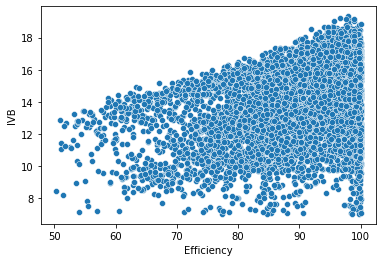

In [7]:
sns.scatterplot(x = 'Efficiency', y = 'IVB', data = allFBclean)

<AxesSubplot:xlabel='SpinRate', ylabel='IVB'>

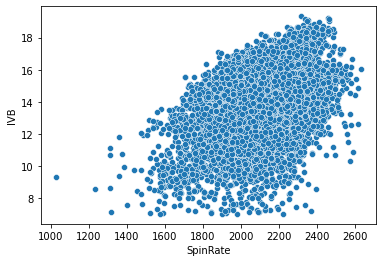

In [8]:
sns.scatterplot(x = 'SpinRate', y = 'IVB', data = allFBclean)

<AxesSubplot:xlabel='Tilt', ylabel='IVB'>

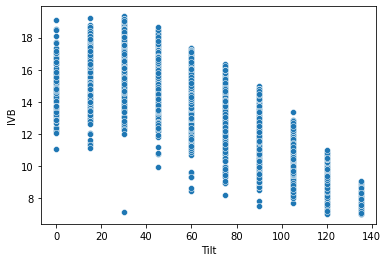

In [9]:
sns.scatterplot(x = 'Tilt', y = 'IVB', data = allFBclean)

<AxesSubplot:xlabel='SpinAxis', ylabel='IVB'>

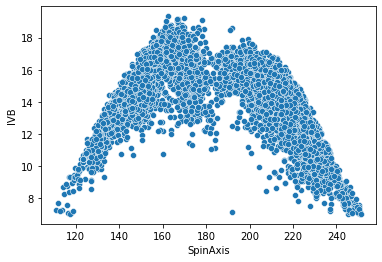

In [10]:
sns.scatterplot(x = 'SpinAxis', y = 'IVB', data = allFBclean)

<AxesSubplot:xlabel='Velocity', ylabel='IVB'>

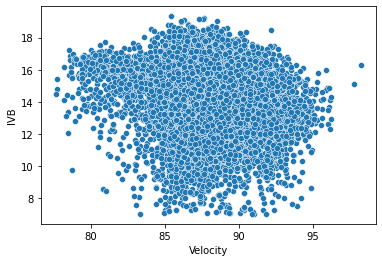

In [11]:
sns.scatterplot(x = 'Velocity', y = 'IVB', data = allFBclean)

<AxesSubplot:xlabel='Extension', ylabel='IVB'>

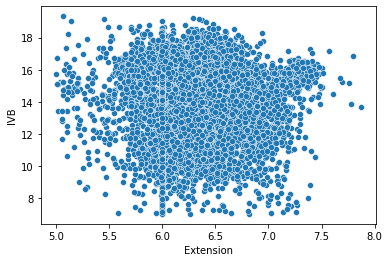

In [12]:
sns.scatterplot(x = 'Extension', y = 'IVB', data = allFBclean)

<AxesSubplot:xlabel='GyroSpin', ylabel='IVB'>

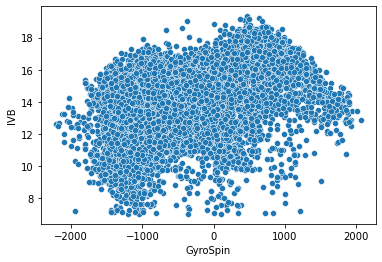

In [13]:
sns.scatterplot(x = 'GyroSpin', y = 'IVB', data = allFBclean)

Features chosen for regression analysis:
- Spin Rate
- Spin Efficiency
- Spin Axis
- Velocity
- Extension
- Gyro Spin

Tilt will not be used as it is pretty much the same metric as Spin Axis, but at 15 minute intervals, so the accuracy would likely be less accurate using tilt than Spin Axis. Velocity and Extension show no correlation when compared to IVB in the single variable scatterplots, but they will be left in to see if there is a correlation in the multi-dimensional regression analysis.

In [14]:
X = allFBclean.drop(columns = ['IVB', 'VB', 'Tilt', 'PitcherThrows'])
y = allFBclean['IVB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train

,Efficiency,SpinRate,SpinAxis,Velocity,Extension,GyroSpin
202,84.132282,2166.596133,237.010115,85.942797,5.542276,-1171.116687
3,95.97785,1806.732122,212.942451,90.093602,6.0,-507.255071
99,80.793225,1935.3124,232.037915,88.863857,6.25148,-1140.431966
308,95.062869,2327.83288,224.156748,89.050497,5.916016,-722.397845
83,88.741275,2197.824558,230.244827,89.133135,6.454602,-1013.143734
...,...,...,...,...,...,...
161,92.915621,2118.688554,226.897177,90.457576,7.123043,-783.252373
50,99.731149,2232.653434,224.796015,92.859882,6.936082,-163.606408
304,98.788288,2063.003239,218.161546,91.230764,6.354405,-320.180655
16,93.059127,2210.490221,172.644356,90.145201,6.0,809.171952


In [46]:
proc = ColumnTransformer(
    transformers = [('quad', PolynomialFeatures(degree=2), ['SpinAxis'])],
    remainder = 'passthrough'
)
pl1 = Pipeline([
    ('preprocessor', proc),
    ('lin-reg', LinearRegression())
]).fit(X_train, y_train)
pl1_pred = pl1.predict(X_test)
train_rmse1 = np.sqrt(mean_squared_error(pl1.predict(X_train), np.array(y_train)))
print('train RMSE Model 1: ' + str(train_rmse1))
test_rmse1 = np.sqrt(mean_squared_error(pl1_pred, np.array(y_test)))
print('test RMSE Model 1: ' + str(test_rmse1))
r2 = r2_score(y_train, pl1.predict(X_train))
print('R^2: ' + str(r2))

train RMSE Model 1: 0.3002480119934092
test RMSE Model 1: 0.2977111478318246
R^2: 0.9812815805421254


In [55]:
print('Coefficients: ' + str(pl1.get_params()['lin-reg'].coef_))
print('Intercept: ' + str(pl1.get_params()['lin-reg'].intercept_))

Coefficients: [ 0.00000000e+00  7.10051786e-01 -1.97226770e-03  9.48647300e-02
  4.60342110e-03 -1.55123299e-01 -5.02363373e-01 -7.16990068e-05]
Intercept: -48.928816479508505


<AxesSubplot:xlabel='IVB', ylabel='Count'>

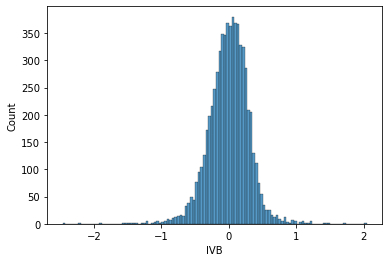

In [48]:
#Check assumption: normality of residuals
sns.histplot(pl1.predict(X_train) - y_train)

In [49]:
#Check assumption: Average value of residuals = 0
np.mean(pl1.predict(X_train) - y_train)

-1.499338565474087e-13

[Text(0, 0.5, 'Residuals')]

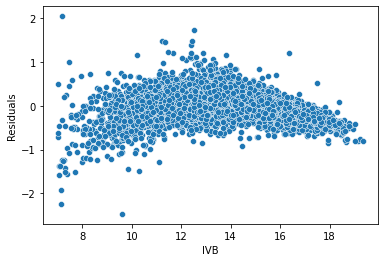

In [50]:
#Check assumption: Constant Variance of Residuals/Homoscedasticity
sns.scatterplot(x = y_train, y = pl1.predict(X_train) - y_train).set(ylabel = 'Residuals')

In [ ]:
#Check assumption: Endogeneity

In [ ]:
#Check assumption: Autocorrelation

In [ ]:
#Check assumption: Multicollinearity

For a second linear regression model, the SpinAxis column will to be linearized to avoid the use of a quadratic feature. As seen in the scatterplot above, there is not a linear relationship between IVB and Spin Axis. Its lack of linearity comes from the way the metric is calculated. It is circular, with 0/360 degrees representing directly downward spin, 180 degrees represeting directly upward spin, 90 degrees representing leftward spin (from the pitcher's perspective), and 270 degrees representing rightward spin. Fastballs will have upward spin, so the distance between the true spin axis of the pitch and 180 degrees is important. As seen in the scatterplot, there seems to be a gap at 180 degrees, right where the peak of a parabola of best fit may be. Left handed pitchers will throw fastballs on the left side of that gap, having spin axes between 90 and 180 degrees, and right handed pitchers will throw fastballs on the right side of the gap, between 180 and 270 degrees. To control for the handedness of the pitcher, and linearize the relationship between IVB and Spin Axis, the absolute difference of the Spin Axis and 180 will be used for the regression model.

The transformation and new scatterplot is shown below.

<AxesSubplot:xlabel='SpinAxis', ylabel='IVB'>

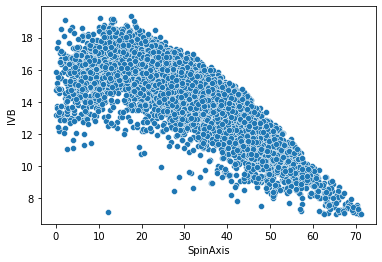

In [38]:
sns.scatterplot(x = abs(allFBclean['SpinAxis'] - 180), y = allFBclean['IVB'])

In [51]:
proc = ColumnTransformer(
    transformers = [('conv', FunctionTransformer(lambda x: abs(x-180)), ['SpinAxis'])],
    remainder = 'passthrough'
)
pl2 = Pipeline([
    ('preprocessor', proc),
    ('lin-reg', LinearRegression())
]).fit(X_train, y_train)
pl2_pred = pl2.predict(X_test)
train_rmse2 = np.sqrt(mean_squared_error(pl2.predict(X_train), np.array(y_train)))
print('train RMSE Model 1: ' + str(train_rmse2))
test_rmse2 = np.sqrt(mean_squared_error(pl2_pred, np.array(y_test)))
print('test RMSE Model 1: ' + str(test_rmse2))
r2_2 = r2_score(y_train, pl2.predict(X_train))
print('R^2: ' + str(r2_2))

train RMSE Model 1: 0.46450365227379
test RMSE Model 1: 0.4549957151050161
R^2: 0.9551990565056365


In [54]:
print('Coefficients: ' + str(pl2.get_params()['lin-reg'].coef_))
print('Intercept: ' + str(pl2.get_params()['lin-reg'].intercept_))

Coefficients: [-1.33632887e-01  1.16246026e-01  4.55035280e-03 -1.66017566e-01
 -5.23431198e-01 -3.26349948e-04]
Intercept: 16.06541265892971


<AxesSubplot:xlabel='IVB', ylabel='Count'>

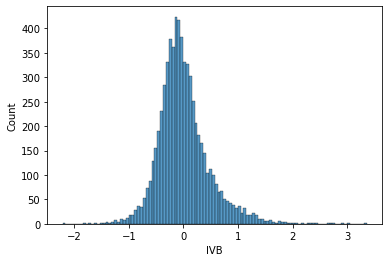

In [56]:
#Check assumption: normality of residuals
sns.histplot(pl2.predict(X_train) - y_train)

In [59]:
#Check assumption: Average value of residuals = 0
np.mean(pl2.predict(X_train) - y_train)

1.119636555209275e-15

[Text(0, 0.5, 'Residuals')]

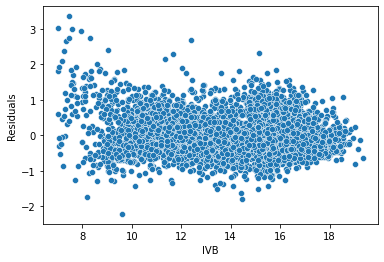

In [60]:
#Check assumption: Constant Variance of Residuals/Homoscedasticity
sns.scatterplot(x = y_train, y = pl2.predict(X_train) - y_train).set(ylabel = 'Residuals')

In [ ]:
#Check assumption: Endogeneity

In [ ]:
#Check assumption: Autocorrelation

In [ ]:
#Check assumption: Multicollinearity

In [ ]:
#Lasso

In [ ]:
#Bauer Units instead of Velo/Spin rate 

In [ ]:
#Find importance of features

In [54]:
allFBcleani = allFBclean.assign(index = list(range(allFBclean.shape[0]))).set_index('index')
training = allFBcleani.sample(int(allFBclean.shape[0] * .8), random_state = 10).drop(columns = ['PitcherThrows']).astype(float)
training

,IVB,VB,Efficiency,SpinRate,Tilt,SpinAxis,Velocity,Extension,GyroSpin
index,,,,,,,,,
6264,9.830295,-25.182045,64.485795,2111.672639,90.0,226.014440,88.033808,6.625542,-1613.956554
2865,14.111481,-24.540127,96.813089,2175.077076,75.0,221.232439,85.334752,6.119323,-544.736652
4269,14.236431,-20.997743,96.614460,1968.704441,75.0,145.654780,90.046521,5.550288,507.928048
6681,15.014474,-25.552935,99.198554,2157.781997,75.0,221.223341,84.429014,5.665782,-272.638795
5222,14.444903,-18.584861,99.994080,2310.489423,75.0,218.134772,90.214461,6.864852,-25.139797
...,...,...,...,...,...,...,...,...,...
6809,19.026000,-21.100084,95.693020,2347.047391,30.0,161.745428,86.088394,5.144381,681.390284
673,11.027482,-25.626500,74.878104,2077.795965,90.0,223.515685,88.082630,6.198125,-1377.199403
5356,15.797926,-17.014250,99.664247,2367.810295,60.0,212.448547,92.099781,6.528533,-193.868531


In [55]:
training_i = list(training.index)
test_i = []
for i in range(allFBclean.shape[0]):
    if i not in training_i:
        test_i.append(i)
test = allFBcleani.loc[test_i].drop(columns = ['PitcherThrows']).astype(float)
test

,IVB,VB,Efficiency,SpinRate,Tilt,SpinAxis,Velocity,Extension,GyroSpin
index,,,,,,,,,
0,15.395050,-15.225392,95.698067,2243.318786,45.0,203.456409,93.181195,7.268723,-650.902744
3,15.150609,-15.166215,96.021025,2268.054005,45.0,205.624413,93.044028,7.239898,-633.417894
14,16.589734,-25.689715,99.974702,2000.404860,60.0,151.947122,81.023939,6.168239,-44.993419
26,17.172006,-15.981737,91.536020,2367.014683,30.0,162.784610,92.023183,5.908421,953.045168
30,14.668490,-17.052092,97.073205,2351.160901,75.0,216.445304,92.645098,6.690151,-564.666808
...,...,...,...,...,...,...,...,...,...
8213,14.131978,-21.095766,99.832320,1965.961409,75.0,144.512283,89.106686,6.000000,-113.801513
8214,14.855581,-16.189680,98.290462,2252.398484,60.0,211.302801,93.366277,6.606146,-414.701397
8216,14.054826,-16.714210,98.985777,2157.088164,75.0,214.307433,94.743327,6.690864,-306.440120


Run an OLS model on the training data, first just using all 6 independent variables

In [68]:
ivb, predictors = patsy.dmatrices('IVB ~ Efficiency + SpinRate + SpinAxis + np.power(SpinAxis, 2) + Velocity + Extension + GyroSpin', training)
mod = sm.OLS(ivb, predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IVB   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 5.035e+04
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:12:32   Log-Likelihood:                -1315.8
No. Observations:                6581   AIC:                             2648.
Df Residuals:                    6573   BIC:                             2702.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -49.0219      0.194   -252.746      0.000     -49.402     -48.642
Efficiency                0.0950      0.000    225.764      0.000       0.094       0.096
SpinRate                  0.0046   2.14e-05    214.278      0.000       0.005       0.005
SpinAxis                  0.7117      0.002    392.116      0.000       0.708       0.715
np.power(SpinAxis, 2)    -0.0020   4.86e-06   -406.821      0.000      -0.002      -0.002
Velocity                 -0.1551      0.001   -113.655      0.000      -0.158      -0.152
Extension                -0.5060      0.010    -51.789      0.000      -0.525      -0.487
GyroSpin              -8.166e-05   6.09e-06    -13.417      0.000   -9.36e-05   -6.97e-05
==============================================================================
Omnibus:                      597.901   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3292.436
Skew:                           0.251   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                     2.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
ivb_test, predictors_test = patsy.dmatrices('IVB ~ Efficiency + SpinRate + SpinAxis + np.power(SpinAxis, 2) + Velocity + Extension + GyroSpin', test)
np.sqrt(mean_squared_error(res.predict(predictors_test), ivb_test))

0.31609083541666794